<a href="https://colab.research.google.com/github/b-toxyscrungeon/screwmenot/blob/master/Playing%20Chess%20using%20Min-Max%20Solution_Template_MinMax_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Artificial and Computational Intelligence Assignment 2

## Gaming with Min-Max Algorithm - Solution template

### List only the BITS (Name) of active contributors in this assignment:
1. Manas Tuteja 2022AC05507
2.
3.
4.
5.

# Things to follow

1. Use appropriate data structures to represent the graph using python libraries
2. Provide proper documentation
3. Create neat solution without error during game playing

### Coding begins here

### PEAS - Data structures and fringes that define the Agent environment goes here

**PEAS (Performance measure, Environment, Actuators, Sensors)** description for this problem statement would be as follows:

**Performance Measure:** The performance of the AI player can be measured by whether it wins the game or not. The AI player’s goal is to capture all of the opponent’s pieces and checkmate the opponent’s king. The performance could also be measured by the number of moves it takes to win, with fewer moves being better.

**Environment:** The environment is the chess board. It’s a 3x3 grid in this simplified version of chess, and each square can be empty or occupied by a piece. The pieces can be either white or black, and each color corresponds to one player.

**Actuators:** The actuators are the commands that the AI player sends to move its pieces on the board. Each command specifies a piece and a destination square.

**Sensors:** The sensors are the functions in the code that read the current state of the game board. They allow the AI player to know where all the pieces are and whose turn it is to move.

This is a simplified description and actual implementation might require considering more factors. For example, in a more complex version of chess, you might also need to consider factors like the time taken for each move (in timed games), the specific rules of chess (like castling or en passant), and so on.



`The following code file is written in Python 3 without using any external libraries to solve the Chess Problem as shown in the image below`

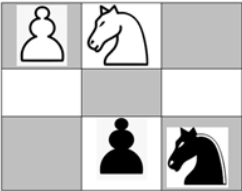

`The implementation initializes White as the Human player and Black as CPU. This can be changed by changing the variable player_turn in Class Game `

### Implementation of the Min-Max algorithm






```
def minimax(self, depth, player):
        max_player = player == 'W'
        other_player = 'B' if player == 'W' else 'W'

        # Base case – terminal position or maximum depth reached
        if depth == 0 or not self.has_valid_moves(player):
            return self.evaluate(), None

        best_move = None

        # Recursive case - maximize your gains or minimize the opponent's gains
        if max_player:
            best_score = float('-inf')
            for i in range(3):
                for j in range(3):
                    for x in range(3):
                        for y in range(3):
                            if self.is_valid(i, j, x, y):
                                move = (i, j, x, y)
                                self.make_move(move)
                                score = self.minimax(depth - 1, other_player)[0]
                                self.undo_move(move)
                                if score > best_score:
                                    best_score = score
                                    best_move = move
        else: # Minimizing player
            best_score = float('inf')
            for i in range(3):
                for j in range(3):
                    for x in range(3):
                        for y in range(3):
                            if self.is_valid(i, j, x, y):
                                move = (i, j, x, y)
                                self.make_move(move)
                                score = self.minimax(depth - 1, other_player)[0]
                                self.undo_move(move)
                                if score < best_score:
                                    best_score = score
                                    best_move = move

        return best_score, best_move
    
```



### Choice and implementation of the Static Evaluation Function

```
def evaluate(self):
        score = 0
        for i in range(3):
            for j in range(3):
                if self.board[i][j] != '  ':
                    piece_score = 1 if self.board[i][j] == 'S' else 3
                    player_multiplier = 1 if self.board[i][j][0] == 'W' else -1
                    score += piece_score * player_multiplier
        return score
```



    

The `evaluate` function is a heuristic function used in the Minimax algorithm to evaluate the desirability of the game state. In other words, it gives a score to each game state, which the algorithm uses to make decisions.

In this chess game, the `evaluate` function calculates the score based on the value of the pieces on the board. Each type of piece is assigned a `value` (for example, in classic chess, pawns are usually worth 1 point, knights and bishops `3 points, rooks 5 points, and queens 9 points` because that is number of `maximum tiles/boxes the piece can move at one time`). The function then sums up the values of all pieces for each player. The difference between these sums gives the score of the game state: `a positive score means that white is winning`, `a negative score means that black is winning`, `and a score of zero means that the game is balanced`.

This is a simple and common way to implement an evaluation function for chess, but it's not the only possible method. More `complex evaluation functions` could also take into account `other factors like piece position, control of the center, king safety, etc.` The choice of evaluation function can have a big impact on the AI's playing style and effectiveness.

#Using the Minimax and Evaluate functions in Class Game to define environment and run simulation

In [70]:
import time
class Game:

    #Chess board using List of Lists for a 2D Array
    #W - White, B - Black, S - Soldier, H - Horse, '  ' - Empty

    def __init__(self):
        self.board = [['WS', 'WH', '  '], ['  ', '  ', '  '], ['  ', 'BS', 'BH']]
        self.player_turn = 'W'

    def draw_board(self):
        for i in range(3):
            for j in range(3):
                print('{} '.format(self.board[i][j]), end="")
            print()

    def is_valid(self, px, py, nx, ny):
    # Check if the move is within the board
      if nx < 0 or ny < 0 or nx >= 3 or ny >= 3:
        return False
    # Check if the destination square is empty or contains an opponent's piece
      if self.board[nx][ny] != '  ' and self.board[nx][ny][0] == self.board[px][py][0]:
        return False
    # Check the move rules for Soldier and Horse
      if self.board[px][py][1] == 'S':
        if px + 1 == nx and py == ny:
            return True
        if px + 1 == nx and (py - 1 == ny or py + 1 == ny) and self.board[nx][ny] != '  ':
            return True
      elif self.board[px][py][1] == 'H':
        if abs(px - nx) == 2 and abs(py - ny) == 1 or abs(px - nx) == 1 and abs(py - ny) == 2:
            return True
      return False


    def has_valid_moves(self, player):
        for i in range(3):
            for j in range(3):
                if self.board[i][j] != ' ' and self.board[i][j][0] == player:
                    for x in range(3):
                        for y in range(3):
                            if self.is_valid(i, j, x, y):
                                return True
        return False


### Choice and implementation of the Static Evaluation Function.


    def evaluate(self):
        score = 0
        for i in range(3):
            for j in range(3):
                if self.board[i][j] != '  ':
                    piece_score = 1 if self.board[i][j][0] == 'S' else 3
                    player_multiplier = 1 if self.board[i][j][0] == 'W' else -1
                    score += piece_score * player_multiplier
        return score



    def minimax(self, depth, player):
        max_player = player == 'W'
        other_player = 'B' if player == 'W' else 'W'

        # Base case – terminal position or maximum depth reached
        if depth == 0 or not self.has_valid_moves(player):
            return self.evaluate(), None

        best_move = None

        # Recursive case - maximize your gains or minimize the opponent's gains
        if max_player:
            best_score = float('-inf')
            for i in range(3):
                for j in range(3):
                    for x in range(3):
                        for y in range(3):
                            if self.is_valid(i, j, x, y):
                                move = (i, j, x, y)
                                self.make_move(move)
                                score = self.minimax(depth - 1, other_player)[0]
                                self.undo_move(move)
                                if score > best_score:
                                    best_score = score
                                    best_move = move
        else: # Minimizing player
            best_score = float('inf')
            for i in range(3):
                for j in range(3):
                    for x in range(3):
                        for y in range(3):
                            if self.is_valid(i, j, x, y):
                                move = (i, j, x, y)
                                self.make_move(move)
                                score = self.minimax(depth - 1, other_player)[0]
                                self.undo_move(move)
                                if score < best_score:
                                    best_score = score
                                    best_move = move

        return best_score, best_move


    def make_move(self, move):
        px, py, nx, ny = move
        self.board[nx][ny], self.board[px][py] = self.board[px][py], '  '
        if self.player_turn == 'W':
            self.player_turn = 'B'
        else:
            self.player_turn = 'W'

    def undo_move(self, move):
        px, py, nx, ny = move
        self.board[px][py], self.board[nx][ny] = self.board[nx][ny], self.board[px][py]

    def is_end(self):
        # Check for win condition - one player has no valid moves left
        if not self.has_valid_moves('W'):
            return 'B'
        if not self.has_valid_moves('B'):
            return 'W'

def main():
    game = Game()
    print("Chess v/s CPU Minmax")
    print("")
    while True:
        print("")
        game.draw_board()
        if game.player_turn == 'W':
            while True:
                print("Enter your move (old x, old y, new x, new y): ")
                move = tuple(map(int, input().split()))
                start = time.time()
                if game.is_valid(*move):
                    break
                else:
                    print("Invalid move, please try again.")
        else:
            _, move = game.minimax(3, 'B')
        game.make_move(move)

        result = game.is_end()

        if result:
            if result == 'draw':
                print("Game over, it's a draw.")
            else:
                print("Game over, {} wins.".format(result))
            break

        end = time.time()



In [72]:


if __name__ == "__main__":
    main()


Chess v/s CPU Minmax


WS WH    
         
   BS BH 
Enter your move (old x, old y, new x, new y): 
0 1 2 0 

WS       
         
WH BS BH 
Game over, W wins.


### Implementation of the alpha-beta pruning  

*Alpha-beta pruning is an optimization technique used in game theory and other decision-making domains. It works by maintaining two values, alpha and beta, during the search process. Alpha represents the best value that the maximizing player has found so far, while beta represents the best value that the minimizing player has found.
The algorithm works by eliminating parts of the search tree that are not relevant to the final decision. This reduces the time and resources required for the search.
The condition for Alpha-beta Pruning is that α >= β. Alpha can only be updated when it's MAX's time, and beta can only be updated when it's MIN's turn.*


###Code block to run minmax algorithm with Alpha-Beta Pruning
```

def minimax(self, depth, alpha, beta, player):
    max_player = player == 'W'
    other_player = 'B' if player == 'W' else 'W'

    # Base case – terminal position or maximum depth reached
    if depth == 0 or not self.has_valid_moves(player):
        return self.evaluate(), None

    best_move = None

    # Recursive case - maximize your gains or minimize the opponent's gains
    if max_player:
        best_score = float('-inf')
        for i in range(3):
            for j in range(3):
                for x in range(3):
                    for y in range(3):
                        if self.is_valid(i, j, x, y):
                            move = (i, j, x, y)
                            self.make_move(move)
                            score = self.minimax(depth - 1, alpha, beta, other_player)[0]
                            self.undo_move(move)
                            if score > best_score:
                                best_score = score
                                best_move = move
                            alpha = max(alpha, score)
                            if beta <= alpha:
                                return best_score, best_move
    else: # Minimizing player
        best_score = float('inf')
        for i in range(3):
            for j in range(3):
                for x in range(3):
                    for y in range(3):
                        if self.is_valid(i, j, x, y):
                            move = (i, j, x, y)
                            self.make_move(move)
                            score = self.minimax(depth - 1, alpha, beta, other_player)[0]
                            self.undo_move(move)
                            if score < best_score:
                                best_score = score
                                best_move = move
                            beta = min(beta, score)
                            if beta <= alpha:
                                return best_score, best_move

    return best_score, best_move
```



Re-Writing the minmax funciton in Class Game

In [73]:

class Game:
    def __init__(self):
        self.board = [['WS', 'WH', '  '], ['  ', '  ', '  '], ['  ', 'BS', 'BH']]
        self.player_turn = 'W'

    def draw_board(self):
        for i in range(3):
            for j in range(3):
                print('{} '.format(self.board[i][j]), end="")
            print()

    def is_valid(self, px, py, nx, ny):
    # Check if the move is within the board
      if nx < 0 or ny < 0 or nx >= 3 or ny >= 3:
        return False
    # Check if the destination square is empty or contains an opponent's piece
      if self.board[nx][ny] != '  ' and self.board[nx][ny][0] == self.board[px][py][0]:
        return False
    # Check the move rules for Soldier and Horse
      if self.board[px][py][1] == 'S':
        if px + 1 == nx and py == ny:
            return True
        if px + 1 == nx and (py - 1 == ny or py + 1 == ny) and self.board[nx][ny] != '  ':
            return True
      elif self.board[px][py][1] == 'H':
        if abs(px - nx) == 2 and abs(py - ny) == 1 or abs(px - nx) == 1 and abs(py - ny) == 2:
            return True
      return False


    def has_valid_moves(self, player):
        for i in range(3):
            for j in range(3):
                if self.board[i][j] != ' ' and self.board[i][j][0] == player:
                    for x in range(3):
                        for y in range(3):
                            if self.is_valid(i, j, x, y):
                                return True
        return False


### Choice and implementation of the Static Evaluation Function.


    def evaluate(self):
        score = 0
        for i in range(3):
            for j in range(3):
                if self.board[i][j] != '  ':
                    piece_score = 1 if self.board[i][j][0] == 'S' else 3
                    player_multiplier = 1 if self.board[i][j][0] == 'W' else -1
                    score += piece_score * player_multiplier
        return score


#Re-Written MiniMax for alpha-beta pruning
    def minimax(self, depth, alpha, beta, player):

      max_player = player == 'W'
      other_player = 'B' if player == 'W' else 'W'

      # Base case – terminal position or maximum depth reached
      if depth == 0 or not self.has_valid_moves(player):
          return self.evaluate(), None

      best_move = None

      # Recursive case - maximize your gains or minimize the opponent's gains
      if max_player:
          best_score = float('-inf')
          for i in range(3):
              for j in range(3):
                  for x in range(3):
                      for y in range(3):
                          if self.is_valid(i, j, x, y):
                              move = (i, j, x, y)
                              self.make_move(move)
                              score = self.minimax(depth - 1, alpha, beta, other_player)[0]
                              self.undo_move(move)
                              if score > best_score:
                                  best_score = score
                                  best_move = move
                              alpha = max(alpha, score)
                              if beta <= alpha:
                                  return best_score, best_move
      else: # Minimizing player
          best_score = float('inf')
          for i in range(3):
              for j in range(3):
                  for x in range(3):
                      for y in range(3):
                          if self.is_valid(i, j, x, y):
                              move = (i, j, x, y)
                              self.make_move(move)
                              score = self.minimax(depth - 1, alpha, beta, other_player)[0]
                              self.undo_move(move)
                              if score < best_score:
                                  best_score = score
                                  best_move = move
                              beta = min(beta, score)
                              if beta <= alpha:
                                  return best_score, best_move

      return best_score, best_move

    def make_move(self, move):
        px, py, nx, ny = move
        self.board[nx][ny], self.board[px][py] = self.board[px][py], '  '
        if self.player_turn == 'W':
            self.player_turn = 'B'
        else:
            self.player_turn = 'W'

    def undo_move(self, move):
        px, py, nx, ny = move
        self.board[px][py], self.board[nx][ny] = self.board[nx][ny], self.board[px][py]

    def is_end(self):
        # Check for win condition - one player has no valid moves left
        if not self.has_valid_moves('W'):
            return 'B'
        if not self.has_valid_moves('B'):
            return 'W'


Playing Game with Alpha-Beta Pruned MinMax

In [74]:
#Code Block


def main():
    game = Game()
    while True:
        game.draw_board()
        if game.player_turn == 'W':
            while True:
                print("Enter your move (old x, old y, new x, new y): ")
                move = tuple(map(int, input().split()))
                if game.is_valid(*move):
                    break
                else:
                    print("Invalid move, please try again.")
        else:
            _, move = game.minimax(3, 'B')
        game.make_move(move)

        result = game.is_end()
        if result:
            if result == 'draw':
                print("Game over, it's a draw.")
            else:
                print("Game over, {} wins.".format(result))
            break


def main():
    game = Game()
    print("Chess v/s CPU Minmax using Alpha-Beta Pruning")
    print("")
    while True:
        print("")
        game.draw_board()
        if game.player_turn == 'W':

            while True:
                print("Enter your move (old x, old y, new x, new y): ")

                move = tuple(map(int, input().split()))
                start = time.time()
                if game.is_valid(*move):
                    break
                else:
                    print("Invalid move, please try again.")
        else:
            _, move = game.minimax(3,float('-inf'), float('inf'), 'B')
        game.make_move(move)

        result = game.is_end()

        if result:
            if result == 'draw':
                print("Game over, it's a draw.")
            else:
                print("Game over, {} wins.".format(result))
            break



if __name__ == "__main__":
    main()


Chess v/s CPU Minmax using Alpha-Beta Pruning


WS WH    
         
   BS BH 
Enter your move (old x, old y, new x, new y): 
0 1 2 2
Game over, W wins.
